In [4]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import cv2
import scipy
import sys
import math
from scipy import ndimage
from IPython.display import display
from PIL import Image

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Validation accuracy for epoch 1 is: 0.7698000073432922
Validation accuracy for epoch 2 is: 0.8202000260353088
Validation accuracy for epoch 3 is: 0.8414000272750854
Validation accuracy for epoch 4 is: 0.8705999851226807
Validation accuracy for epoch 5 is: 0.8826000094413757
Validation accuracy for epoch 6 is: 0.899399995803833
Validation accuracy for epoch 7 is: 0.9021999835968018
Validation accuracy for epoch 8 is: 0.9082000255584717
Validation accuracy for epoch 9 is: 0.9142000079154968
Validation accuracy for epoch 10 is: 0.9161999821662903


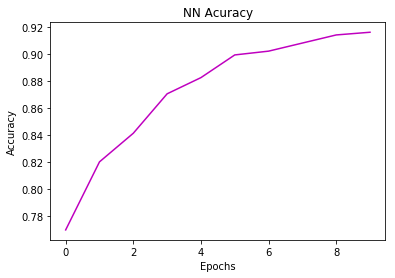

Accuracy for test set: 0.9524000287055969


In [5]:
def getBestShift(img):
    cy,cx = ndimage.measurements.center_of_mass(img)

    rows,cols = img.shape
    shiftx = np.round(cols/2.0-cx).astype(int)
    shifty = np.round(rows/2.0-cy).astype(int)

    return shiftx,shifty


def shift(img,sx,sy):
    rows,cols = img.shape
    M = np.float32([[1,0,sx],[0,1,sy]])
    shifted = cv2.warpAffine(img,M,(cols,rows))
    return shifted


#weight initalization func
def weight_variable(shape):
    initial= tf.truncated_normal(shape)
    return tf.Variable(initial)
#def bias_variable(shape):
 #   initial= tf.truncated_normal(shape)
    #initial= tf.constant(0.1,shape=shape)
  #  return tf.Variable(initial)
#load and set the data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)
n_input = 784
n_output = 10
net_input = tf.placeholder(tf.float32, [None, n_input])
y_true = tf.placeholder(tf.float32, [None, n_output])
keep_prob = tf.placeholder(tf.float32)

#build the model
#keep_prob_input= tf.placeholder(tf.float32)
#x_drop= tf.nn.dropout(net_input,keep_prob=keep_prob_input)
##add layers

hidden_size = 256
W_fc1= weight_variable([n_input,hidden_size])
b_fc1= weight_variable([hidden_size])
h_fc1= tf.nn.relu(tf.matmul(net_input,W_fc1)+b_fc1)
h_fc1_drop=tf.nn.dropout(h_fc1,keep_prob)


W_fc2 = weight_variable([hidden_size, n_output])
b_fc2 = weight_variable([n_output])
net_output=(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)
#define accuracy
correct_prediction= tf.equal(tf.argmax(net_output, 1), tf.argmax(y_true, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
cost = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits=net_output, labels=y_true))
#define loss function and optimization
eta = 0.01 
optimizer = tf.train.AdamOptimizer(eta).minimize(cost)
#train the model
sess = tf.Session()
sess.run(tf.global_variables_initializer())
l_loss = list()
l_acc= list()
batch_size=100
n_epochs=10
keep_prob=keep_prob

for epoch_i in range(n_epochs):
    for batch_i in range(0, mnist.train.num_examples, batch_size):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={
            net_input: batch_xs,
            y_true: batch_ys,keep_prob:0.5
        })
    loss = sess.run(accuracy, feed_dict={
                       net_input: mnist.validation.images,
                       y_true: mnist.validation.labels,keep_prob:0.5 })
    print('Validation accuracy for epoch {} is: {}'.format(epoch_i + 1, loss))
    l_loss.append(loss)

    
    
#visual presentation of training
plt.title('NN Acuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.plot(l_loss, color='m')
plt.show()


print("Accuracy for test set: {}".format(sess.run(accuracy,
               feed_dict={
                   net_input: mnist.test.images,
                   y_true: mnist.test.labels,keep_prob:1.0
               })))

In [6]:
#Receiving Custome image
correct=0
total=0
for imgName in glob.glob('c:/Ex1/img/*.jpg'):
    
    # read the image
    gray  = cv2.imread(imgName, 0)
    print('loaded: ' + imgName)
    # resize the image to be 28*28 for the classification to work
    size_factor = 28
    # rescale it
    gray = cv2.resize(255-gray, (size_factor, size_factor))
    # better black and white version
    (thresh, gray) = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    while np.sum(gray[0]) == 0:
        gray = gray[1:]

    while np.sum(gray[:,0]) == 0:
        gray = np.delete(gray,0,1)

    while np.sum(gray[-1]) == 0:
        gray = gray[:-1]

    while np.sum(gray[:,-1]) == 0:
        gray = np.delete(gray,-1,1)

    rows,cols = gray.shape
    if rows > cols:
        factor = 20.0/rows
        rows = 20
        cols = int(round(cols*factor))
        # first cols than rows
        gray = cv2.resize(gray, (cols,rows))
    else:
        factor = 20.0/cols
        cols = 20
        rows = int(round(rows*factor))
        # first cols than rows
        gray = cv2.resize(gray, (cols, rows))

    colsPadding = (int(math.ceil((28-cols)/2.0)),int(math.floor((28-cols)/2.0)))
    rowsPadding = (int(math.ceil((28-rows)/2.0)),int(math.floor((28-rows)/2.0)))
    gray = np.lib.pad(gray,(rowsPadding,colsPadding),'constant')

    shiftx,shifty = getBestShift(gray)
    shifted = shift(gray,shiftx,shifty)
    gray = shifted
    
    
    print(imgName)
    print(imgName.split('c:/Ex1/img\\', 1)[1])
    resized_name = 'C:/Ex1/ResizedPictures\\' + imgName.split('c:/Ex1/img\\', 1)[1]
    print("resized_name: ",resized_name)
    
    # save the processed images
    cv2.imwrite(resized_name, gray)
    
    data = np.vectorize(lambda x: x)(np.ndarray.flatten(scipy.ndimage.imread(resized_name, flatten=True)))
    print(data.shape)
    #print (data)
    with tf.Session() as sess: 
        sess.run(tf.global_variables_initializer())
        result = sess.run(tf.argmax(net_output, 1), feed_dict={
        net_input: [data],keep_prob:1.0})[0]
    original = int(resized_name[23])
    print("it is {} ,classification is {}".format(original, result))
    print(original == result)
    if original == result:
        correct = correct + 1
    total = total + 1
print("correct {} of {} , {}%".format(correct, total, correct/total))

loaded: c:/Ex1/img\1 (111).jpg
c:/Ex1/img\1 (111).jpg
1 (111).jpg
resized_name:  C:/Ex1/ResizedPictures\1 (111).jpg
(784,)
it is 1 ,classification is 8
False
loaded: c:/Ex1/img\1 (119).jpg
c:/Ex1/img\1 (119).jpg
1 (119).jpg
resized_name:  C:/Ex1/ResizedPictures\1 (119).jpg
(784,)
it is 1 ,classification is 4
False
loaded: c:/Ex1/img\2 (6).jpg
c:/Ex1/img\2 (6).jpg
2 (6).jpg
resized_name:  C:/Ex1/ResizedPictures\2 (6).jpg
(784,)
it is 2 ,classification is 0
False
loaded: c:/Ex1/img\4 (104).jpg
c:/Ex1/img\4 (104).jpg
4 (104).jpg
resized_name:  C:/Ex1/ResizedPictures\4 (104).jpg
(784,)
it is 4 ,classification is 2
False
loaded: c:/Ex1/img\4 (99).jpg
c:/Ex1/img\4 (99).jpg
4 (99).jpg
resized_name:  C:/Ex1/ResizedPictures\4 (99).jpg
(784,)
it is 4 ,classification is 4
True
loaded: c:/Ex1/img\6 (87).jpg
c:/Ex1/img\6 (87).jpg
6 (87).jpg
resized_name:  C:/Ex1/ResizedPictures\6 (87).jpg
(784,)
it is 6 ,classification is 9
False
loaded: c:/Ex1/img\7 (56).jpg
c:/Ex1/img\7 (56).jpg
7 (56).jpg
resize